In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt # plotting

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## 1.Data

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path = "/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/churn/Telco_Customer_Churn/data/Telco-Customer-Churn.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## 2. Data Manipulation

In [5]:
#Data Manipulation

#Replacing spaces with null values in TotalCharges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain 0.15% missing data 
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [6]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [7]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


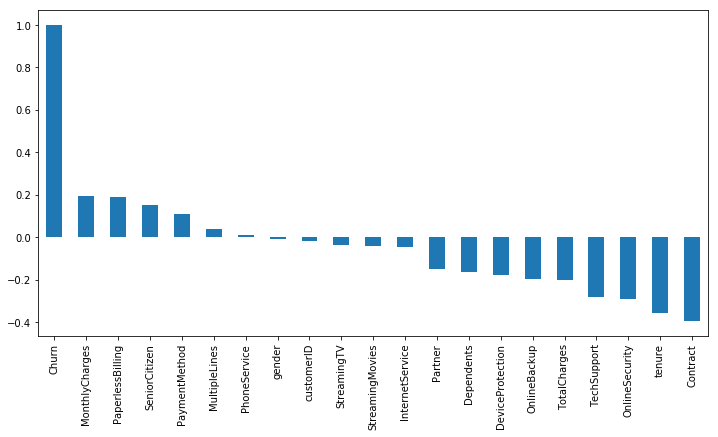

In [8]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,6))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [9]:
plt.savefig("/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/churn/Telco_Customer_Churn/images/corr.png")

<Figure size 432x288 with 0 Axes>

In [10]:
X = df.drop(['Churn','customerID'], 1)
y = df['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

## Paramétres optimaux des modéles

In [12]:
from sklearn.model_selection import GridSearchCV
from time import time

#### 1. DecisionTreeClassifier 

In [13]:
# from sklearn.tree import DecisionTreeClassifier

# start = time()

# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01, 0.05],
#     "max_features": [1., "sqrt"]
#     }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_DT.fit(X_train, y_train)

# end=time()
# train_time_dec=end-start

# print("Train: ",clf_DT.score(X_train, y_train))
# print("Test: ",clf_DT.score(X_test, y_test))
# print("\n")
# print(clf_DT.best_params_)

#### 2. RandomForestClassifier

In [14]:
# from sklearn.ensemble import RandomForestClassifier

# start = time()

# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005, 0.01, 0.1],
#     "min_samples_leaf": [0.0005, 0.001, 0.005, 0.01, 0.01],
#     "max_features":[1.,"sqrt"],
#     "n_estimators":[10, 50, 100, 200, 400]
#     }
        
# clf_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_RF.fit(X_train, y_train)

# end=time()
# train_time_rand=end-start

# print("Train: ",clf_RF.score(X_train, y_train))
# print("Test: ",clf_RF.score(X_test, y_test))
# print("\n")
# print(clf_RF.best_params_)

#### 3. GradientBoostingClassifier

In [15]:
# from sklearn.ensemble import GradientBoostingClassifier

# start = time()

# parameters = {
#     "loss":["deviance", "exponential"],
#     "learning_rate": [0.001, 0.005, 0.01, 0.05],
#     "min_samples_leaf": [0.0001, 0.005, 0.01],
#     "max_depth":[3, 5, 8],
#     "max_features":[0.7, 1],
#     "criterion": ["friedman_mse"],
#     "subsample":[0.7, 1.0],
#     "n_estimators":[10, 50, 100, 200, 400],
#     }
        
# clf_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_GB.fit(X_train, y_train)

# end=time()
# train_time_g=end-start

# print("Train: ",clf_GB.score(X_train, y_train))
# print("Test: ",clf_GB.score(X_test, y_test))
# print("\n")
# print(clf_GB.best_params_)

##### 4. XGBClassifier

In [16]:
# from xgboost import XGBClassifier

# start = time()

# parameters = {
#     "learning_rate": [0.001, 0.005, 0.01, 0.05],
#     "min_samples_leaf": [0.0005, 0.05],
#     "max_depth":[3, 5, 8],
#     "max_features":[0.7, 1],
#     "gamma": [0, 0.5],
#     "subsample":[0.66, 1.0],
#     "colsample_bytree": [0.66, 1.0],
#     "n_estimators":[10, 50, 100, 200, 400],
#     }

# clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_XGB.fit(X_train, y_train)

# end=time()
# train_time_xgb=end-start

# print("Train: ",clf_XGB.score(X_train, y_train))
# print("Test: ",clf_XGB.score(X_test, y_test))
# print("\n")
# print(clf_XGB.best_params_)

#### Conclusion

In [17]:
# model = ['XGBoost','GBoost', 'Random forest','Decision Tree']
# Train_Time = [
#     train_time_xgb/60,
#     train_time_g/60,
#     train_time_rand/60,
#     train_time_dec/60
# ]

# index = np.arange(len(model))
# plt.bar(index, Train_Time)
# plt.xlabel('Machine Learning Models', fontsize=15)
# plt.ylabel('Training Time(minutes)', fontsize=15)
# plt.xticks(index, model, fontsize=10, )
# plt.title('Comparison of Training Time of all ML models  with GridSearchCV')
# plt.show()

In [18]:
# #save modele
# from sklearn.externals import joblib

# file = "/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/churn/Telco_Customer_Churn/models"

# joblib.dump(clf_DT.best_estimator_, file + "/clf_DT", compress = 1)
# joblib.dump(clf_RF.best_estimator_, file + "/clf_RF", compress = 1)
# joblib.dump(clf_GB.best_estimator_, file + "/clf_GB", compress = 1)
# joblib.dump(clf_XGB.best_estimator_, file + "/clf_XGB", compress = 1)

In [19]:
#load models
from sklearn.externals import joblib

file = "/home/malick/Bureau/Stage_Projet_RTS/confluence-JDD/churn/Telco_Customer_Churn/models"

clf_DT = joblib.load(file + "/clf_DT") 
clf_GB = joblib.load(file + "/clf_GB")
clf_XGB = joblib.load(file + "/clf_XGB") 
clf_RF = joblib.load(file + "/clf_RF") 

/home/malick/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


##### On compare les modéles:

In [20]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models

from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            f1_score

y_dt = clf_DT.predict(X_test)
y_rf = clf_RF.predict(X_test)
y_grad = clf_GB.predict(X_test)
y_xgrad = clf_XGB.predict(X_test)

as_dt = accuracy_score(y_test, y_dt)
as_rf = accuracy_score(y_test, y_rf)
as_grad = accuracy_score(y_test, y_grad)
as_xgrad = accuracy_score(y_test, y_xgrad)

# Creates a confusion matrix
cm_dt = confusion_matrix(y_test, y_dt)
cm_rf = confusion_matrix(y_test, y_rf) 
cm_grad = confusion_matrix(y_test, y_grad) 
cm_xgrad = confusion_matrix(y_test, y_xgrad)

option = ['macro', 'micro', 'weighted']
f1_dt = [round(f1_score(y_test, y_dt, average=opt),3) for opt in option]
f1_rf = [round(f1_score(y_test, y_rf, average=opt),3) for opt in option]
f1_grad = [round(f1_score(y_test, y_grad, average=opt),3) for opt in option]
f1_xgrad = [round(f1_score(y_test, y_xgrad, average=opt),3) for opt in option]


models_cross = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting','XGBoost'],
    'Accuracy_score': [as_dt, as_rf, as_grad, as_xgrad],
    'Matrice de confusion': [cm_dt, cm_rf, cm_grad, cm_xgrad],
    "F1 [macro,micro, weighted]": [f1_dt, f1_rf, f1_grad, f1_xgrad]})
    
models_cross.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score,Matrice de confusion,"F1 [macro,micro, weighted]"
2,Gradient Boosting,0.797630,"[[1398, 159], [268, 285]]","[0.72, 0.798, 0.79]"
1,Random Forest,0.791943,"[[1395, 162], [277, 276]]","[0.711, 0.792, 0.784]"
3,XGBoost,0.785308,"[[1377, 180], [273, 280]]","[0.706, 0.785, 0.779]"
0,Decision Tree,0.778199,"[[1361, 196], [272, 281]]","[0.699, 0.778, 0.773]"


In [28]:
clf_XGB.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.66,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': nan,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.66,
 'verbosity': 1,
 'max_features': 0.7,
 'min_samples_leaf': 0.0005}